# **TASK 5- SENTIMENT ANALYSIS**
**STUDENT NAME : SYEDA ALISHBA FATIMA**

**STUDENT ID : DS - 251 - 126**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('/content/IMDB_Dataset.csv')

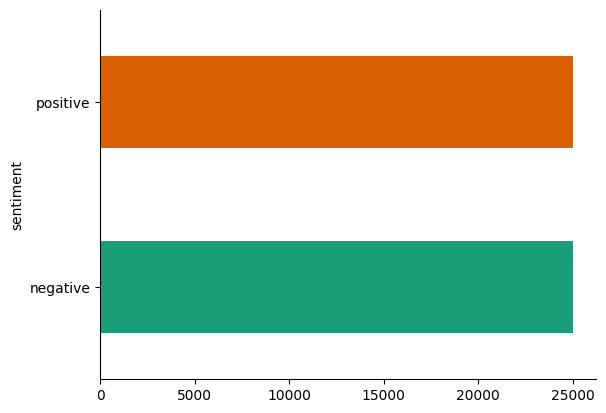

In [3]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
df.isnull().sum() # checking null values

,0
review,0
sentiment,0


In [5]:
df.duplicated().sum() #checking duplicated values

np.int64(419)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(49581, 2)

Text(0, 0.5, '')

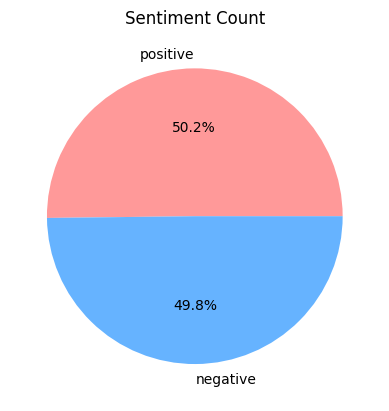

In [8]:
#Pie chart for sentiment count
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Sentiment Count')
plt.ylabel('')

# **Data Preprocessing**
• Prepare the dataset for training by encoding the target variable and cleaning the text
data.
We’ll use regular expressions and some NLP preprocessing techniques like:

Lowercasing

Removing HTML tags

Removing URLs

Removing special characters, punctuation, numbers

Removing stopwords

Lemmatization (reducing words to their base form)

In [9]:
# Encode Sentiments (Binary Values):
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})
df['sentiment'].value_counts()

,count
sentiment,
1,24884
0,24697


In [10]:
# Install NLP dependencies
!pip install scikit-learn matplotlib seaborn nltk

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
# Text Cleaning Function
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()                                   # Lowercase
    text = re.sub(r"<.*?>", " ", text)                         # Remove HTML tags
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)       # Remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)                      # Keep only alphabets
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

In [16]:

# Apply cleaning
df["clean_review"] = df["review"].apply(clean_text)
print(df[["review", "clean_review"]].head(10))

                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   
5  Probably my all-time favorite movie, a story o...   
6  I sure would like to see a resurrection of a u...   
7  This show was an amazing, fresh & innovative i...   
8  Encouraged by the positive comments about this...   
9  If you like original gut wrenching laughter yo...   

                                        clean_review  
0  one reviewer mentioned watching oz episode hoo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...  
5  probably time favorite movie story selflessnes... 


📌 Logistic Regression Results:
Accuracy: 0.8903902389835636
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      4940
           1       0.88      0.90      0.89      4977

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917


📌 MultinomialNB Results:
Accuracy: 0.8577190682666129
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4940
           1       0.85      0.86      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917


📌 Linear SVM Results:
Accuracy: 0.8811132398910961
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4940
           1       0.88      0.89      0.88      4977

    accuracy  

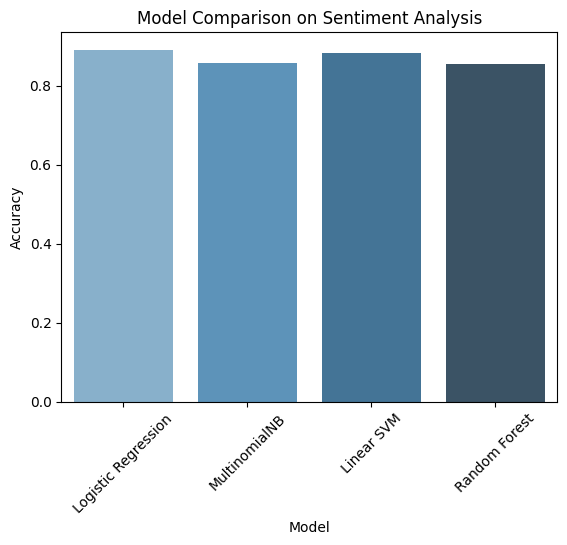

In [17]:
# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Train-Test Split
X = df["clean_review"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=300),
    "MultinomialNB": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n📌 {name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


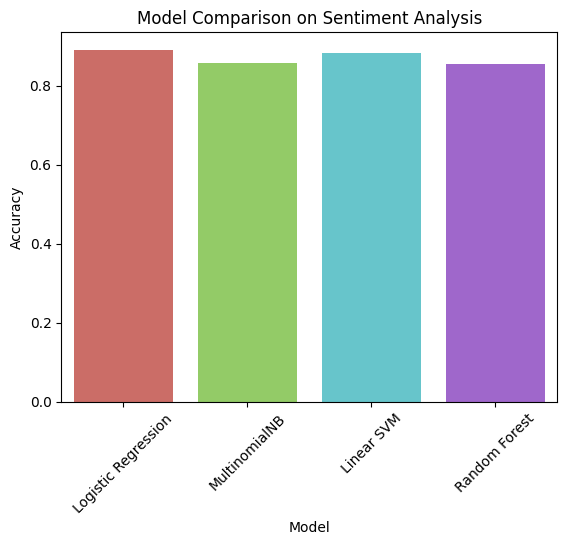

In [22]:
# 📌 Step 8: Compare Results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="hls")
plt.xticks(rotation=45)
plt.title("Model Comparison on Sentiment Analysis")
plt.show()

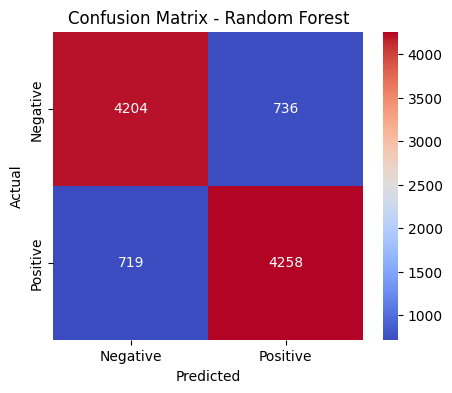

<Figure size 1000x600 with 0 Axes>

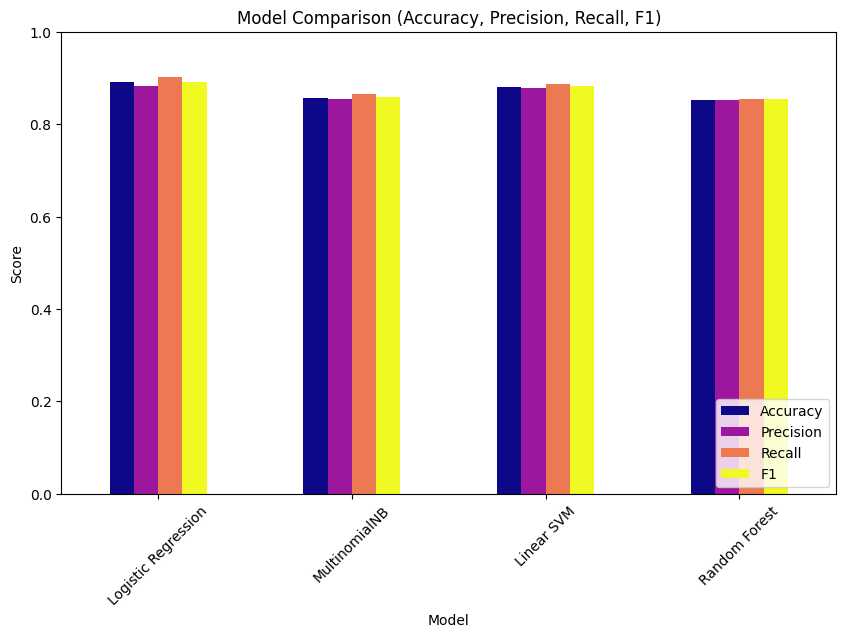

In [30]:
# 📌 Confusion Matrix Heatmap

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="coolwarm", xticklabels=["Negative","Positive"], yticklabels=["Negative","Positive"])
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Comparison Bar Plots
results_df = pd.DataFrame(results_df, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])

plt.figure(figsize=(10,6))
results_df.set_index("Model").plot(kind="bar", figsize=(10,6), colormap="plasma")
plt.title("Model Comparison (Accuracy, Precision, Recall, F1)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.show()